In [2]:
import matplotlib.pyplot as plt
import pandas as pd # for data import/data wrangling
import seaborn as sns # for statistical visualization


In [6]:
storms = pd.read_csv('storm.csv')
storms_cut = storms.iloc[0:159, :] # selecting only the first 159 rows
storms_cut['time'] = pd.to_datetime(storms_cut['time'])
storms_cut.head()


C:\Users\Kiwon\AppData\Local\Temp\ipykernel_19620\2943714683.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  storms_cut['time'] = pd.to_datetime(storms_cut['time'])


,name,time,lat,long,status,wind,pressure
0,Amy,1975-06-27 00:00:00+00:00,27.5,-79.0,tropical depression,25,1013
1,Amy,1975-06-27 06:00:00+00:00,28.5,-79.0,tropical depression,25,1013
2,Amy,1975-06-27 12:00:00+00:00,29.5,-79.0,tropical depression,25,1013
3,Amy,1975-06-27 18:00:00+00:00,30.5,-79.0,tropical depression,25,1013
4,Amy,1975-06-28 00:00:00+00:00,31.5,-78.8,tropical depression,25,1012


In [7]:
storms_cut.dtypes

name                     object
time        datetime64[ns, UTC]
lat                     float64
long                    float64
status                   object
wind                      int64
pressure                  int64
dtype: object

### What kind of questions do we want to answer?

- Generate a histogram of `pressure`; how about different histograms of `pressure` based on each `status`?  
- Generate a boxplot of pressures for each storm (whose names are stored in the `name` column).
- Generate a countplot for each storm.
- Generate a scatter plot between `wind` and `pressure` depicting at the same time a linear line that fits the observations the best.
- Generate a scatter plot depicting the trajectories of each storm using `lat` and `long` column; which means the x-axis describes longitute whereas the y-axis describes latitude information of the center of the storms. Add grid lines as well.
- Generate a scatter plot depicting the `pressure` of each storm with respect to the time line. So the `time` column should be on the x-axis.
- (Challenge yourself) Generate a heat map depicting the average pressure for each combination of storm name and status. 

<Axes: xlabel='pressure', ylabel='Count'>

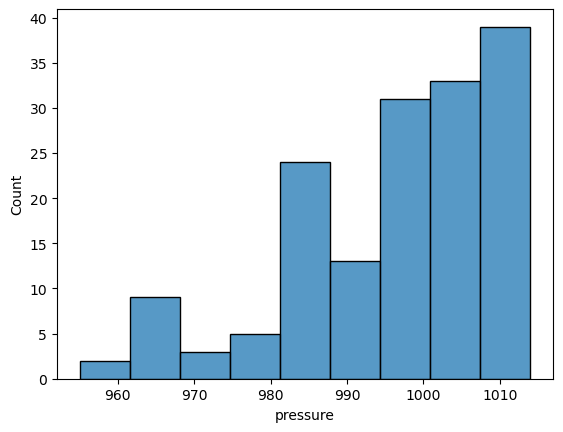

In [8]:
sns.histplot(storms_cut, x="pressure")

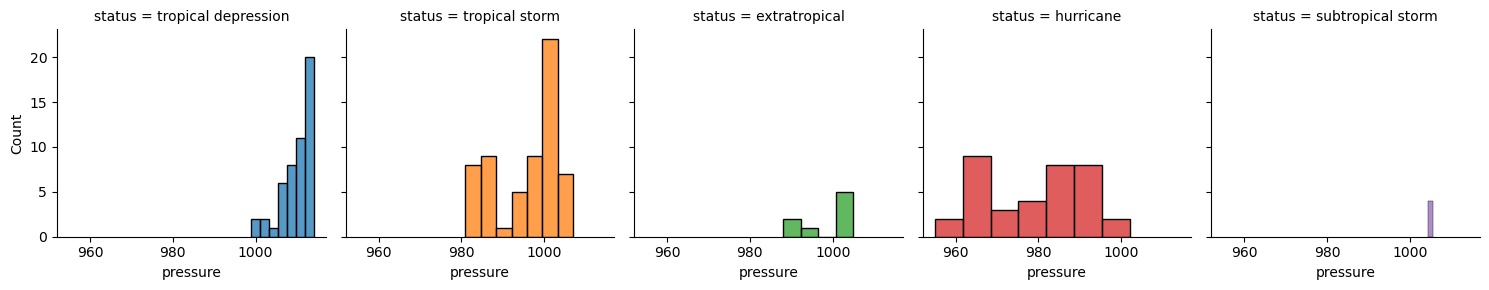

In [9]:
# Use facet grids
g = sns.FacetGrid(storms_cut, col ='status', hue='status') # try row = 'Sex' instead of col = 'Sex'.
g.map(sns.histplot, 'pressure')

<Axes: xlabel='name', ylabel='pressure'>

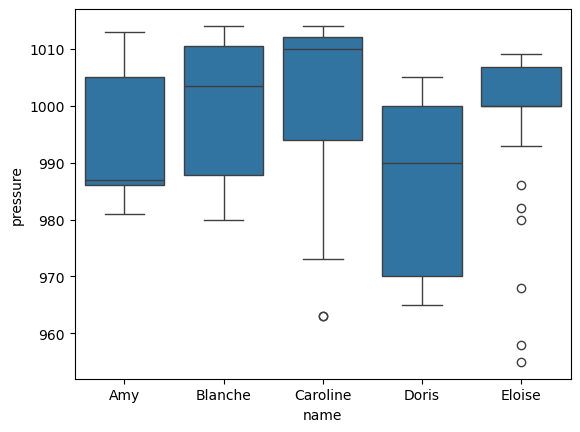

In [6]:
sns.boxplot(storms_cut, x= 'name', y = 'pressure')

<Axes: xlabel='name', ylabel='count'>

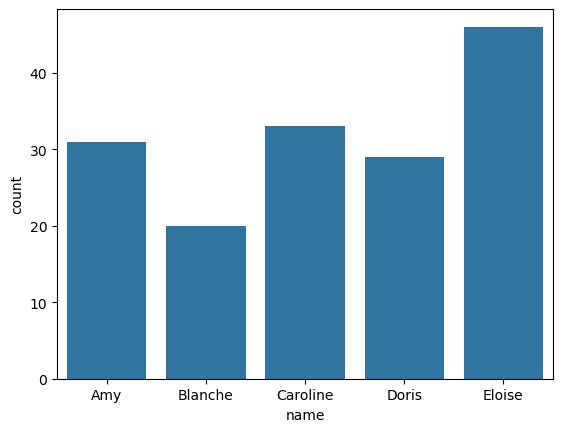

In [10]:
sns.countplot(storms_cut, x= 'name')

<Axes: xlabel='wind', ylabel='pressure'>

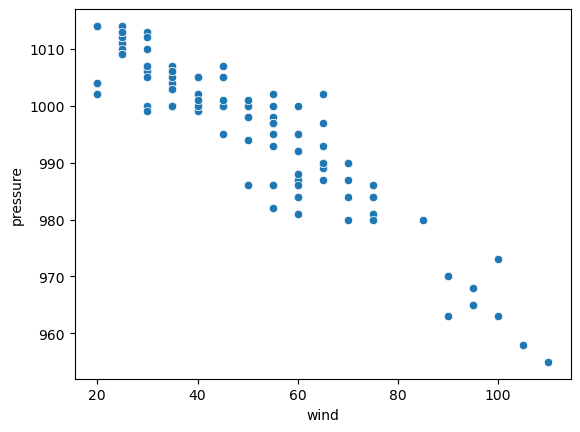

In [11]:
sns.scatterplot(storms_cut, x = 'wind', y = 'pressure')

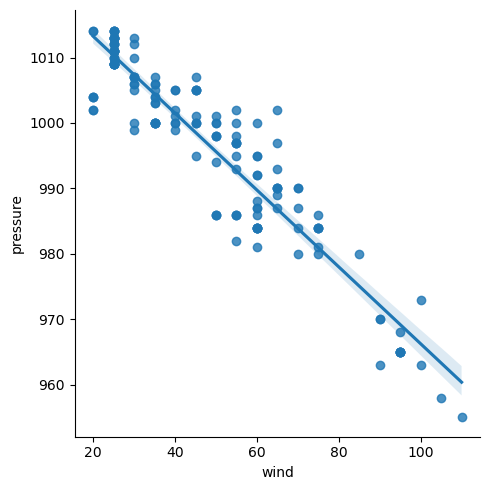

In [9]:
sns.lmplot(x = "wind", y = "pressure", data = storms_cut)

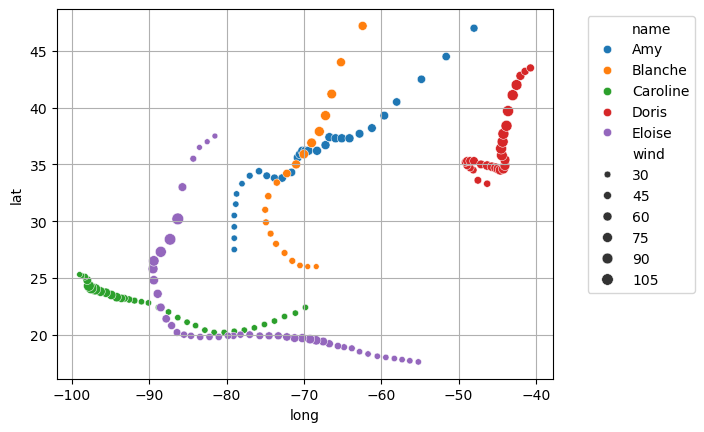

In [12]:
ax = sns.scatterplot(storms_cut, x = 'long', y = 'lat', hue = 'name', size = "wind")
sns.move_legend(ax, "upper right", bbox_to_anchor=(1.3, 1))
plt.grid()

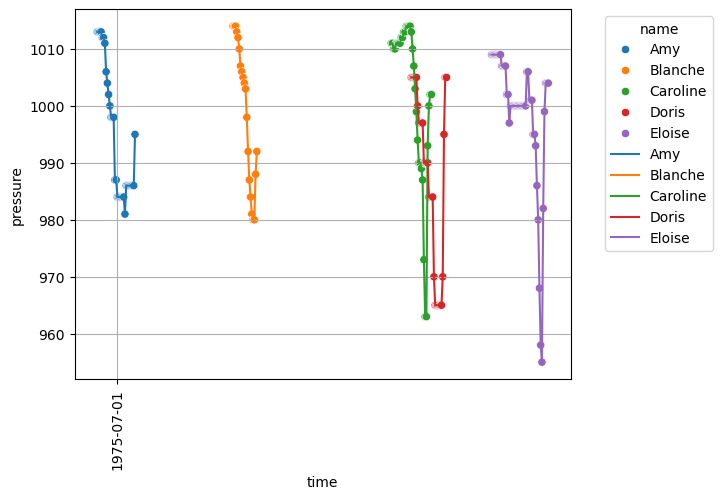

In [13]:
g = sns.scatterplot(storms_cut, x = "time", y="pressure", hue = "name")
sns.lineplot(storms_cut, x = "time", y="pressure", hue = "name")
sns.move_legend(g, "upper right", bbox_to_anchor=(1.3, 1))
plt.xticks(g.get_xticks()[::10], rotation=90)
plt.grid()


In [14]:
mean_pressure = storms_cut.groupby(["name","status"])["pressure"].agg("mean").reset_index()
mean_pressure_wider = mean_pressure.pivot(index = "name", columns = "status", values = "pressure")
mean_pressure_wider

status,extratropical,hurricane,subtropical storm,tropical depression,tropical storm
name,,,,,
Amy,995.0,NaN,NaN,1011.625000,989.136364
Blanche,990.0,982.400000,NaN,1010.555556,999.250000
Caroline,NaN,979.285714,NaN,1010.272727,997.250000
Doris,1005.0,976.625000,1005.0,NaN,998.285714
Eloise,1004.0,979.875000,NaN,1007.727273,1000.125000


<Axes: xlabel='status', ylabel='name'>

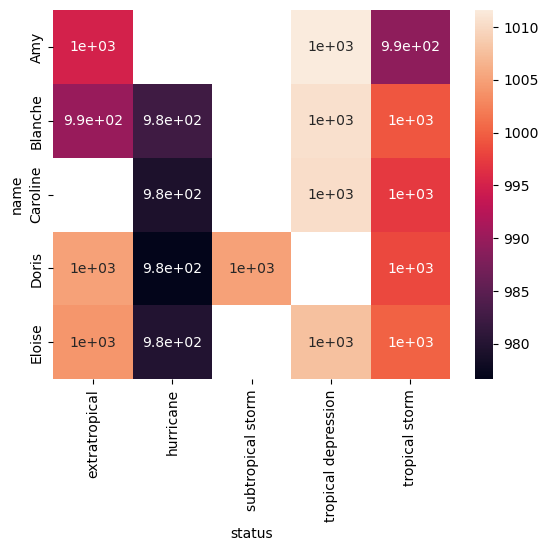

In [16]:
sns.heatmap(mean_pressure_wider, annot = True)